# Inaugural Project

Imports and set magics:

In [2]:
import numpy as np

from types import SimpleNamespace
from scipy import optimize
from scipy.optimize import minimize
import pandas as pd 
import matplotlib.pyplot as plt
import math

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

from inauguralproject import HouseholdClass 

# Question 1

Based on the provided code, we alter the definition of consumption of home goods in inauguralproject.py, to allow for $\sigma\neq1$. 

Following this, we solve the model discretely, and find the intial optimal working hours for men and women, in the the market and at home for $\alpha=0.5$ and $\sigma=1$

In [3]:
#We initiate and solve the discrete model. 
model = HouseholdClass()
initial = model.solve_discrete()

#Printing the results
print(f'The initial optimal hours working at home for women is HF = {initial.HF:.1f}' '\n'f'The initial optimal hours working at home for men is HM = {initial.HM:.1f}''\n'f'The initial optimal hours working at the market for women is LF = {initial.LF:.1f}' '\n'f'The initial optimal hours working at the market for men is LM = {initial.LM:.1f}' )


/Users/idahougaard/OneDrive - Københavns Universitet/projects-2023-ida-simone-elin/inauguralproject/inauguralproject.py:70: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


The initial optimal hours working at home for women is HF = 4.5
The initial optimal hours working at home for men is HM = 4.5
The initial optimal hours working at the market for women is LF = 4.5
The initial optimal hours working at the market for men is LM = 4.5


In the following, we show how relative optimal working hours at home between men and women change dependent on different values of $\sigma$ and $\alpha$. We illustrate this in a table. 

____

In [4]:
#We unpack the model parameters
par = model.par

#We define vectors with the values of alpha and sigma.
alpha_vec = [0.25,0.5,0.75]
sigma_vec = [0.5,1,1.5]

#We create a table with the results of the loop. The values in the table is the logarithm of the relative hours worked at home for men and women. 
def print_table():
    
    #We define an empty text string
    text = ''
    
    # Creating the top header
    text += f'{"Alpha/Sigma":3s}'
    for j, sigma in enumerate(sigma_vec):
       model.par.sigma=sigma
       text += f'{sigma:8.2f}' 
    text += '\n' + "-"*40 + "\n" # creating a line shift 
    
    # Creating the body of the table
    for i, alpha in enumerate(alpha_vec):
        model.par.alpha=alpha
        if i > 0:
            text += '\n' # creating a line shift
        text += f'{alpha:8.2f}    |' # creating the left header
        for j, sigma in enumerate(sigma_vec):
            model.par.sigma=sigma
            opt = model.solve_discrete()
            text += f'{opt.HF/opt.HM:7.2f}'
    
    # Print
    print(text)

#We print the table: 
print_table()

/Users/idahougaard/OneDrive - Københavns Universitet/projects-2023-ida-simone-elin/inauguralproject/inauguralproject.py:66: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha) * HM**((par.sigma-1)/par.sigma) + par.alpha * HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/idahougaard/OneDrive - Københavns Universitet/projects-2023-ida-simone-elin/inauguralproject/inauguralproject.py:66: RuntimeWarning: invalid value encountered in reciprocal
  H = ((1-par.alpha) * HM**((par.sigma-1)/par.sigma) + par.alpha * HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


Alpha/Sigma    0.50    1.00    1.50
----------------------------------------
    0.25    |   0.55   0.31   0.21
    0.50    |   1.00   1.00   1.00
    0.75    |   1.83   3.25   4.67


# Question 2

We now return to $\alpha=0.5$ and $\sigma=1$. 
We vary the female wage $w_F$ and illustrate how it changes $log\frac{H_F}{H_M}$ and $log\frac{w_F}{w_M}$

In [5]:
#We initiate a new model
model2 = HouseholdClass()

#We unpack the model parameters
par = model2.par

#We construct a list to hold the log value of the relative hours between men and women
log_rel_hours_list=[]

#We run a loop over the model where we change women's wage for each iteration
for wage in par.wF_vec:
    par.wF = wage
    opt = model2.solve_discrete()    

    #We calculate the model results for each iteration
    rel_hours = opt.HF/opt.HM
    log_rel_hours = np.log(rel_hours)

    log_rel_wage = np.log(par.wF_vec)

    #We append the results to our list of log values
    log_rel_hours_list = np.append(log_rel_hours_list, log_rel_hours)
 
    #We print our results
    print(f'When womens wage is {wage:.1f} and mens wage is wM = {par.wM:.1f}, the optimal working hours at home are {opt.HF:.1f} for women and {opt.HM:.1f} for men. Thus, their relative working hours are {rel_hours:.3f}. Taking the log of this fraction, we find log(HF/HM) = {log_rel_hours:.3f}.')

When womens wage is 0.8 and mens wage is wM = 1.0, the optimal working hours at home are 5.0 for women and 4.0 for men. Thus, their relative working hours are 1.250. Taking the log of this fraction, we find log(HF/HM) = 0.223.
When womens wage is 0.9 and mens wage is wM = 1.0, the optimal working hours at home are 4.5 for women and 4.5 for men. Thus, their relative working hours are 1.000. Taking the log of this fraction, we find log(HF/HM) = 0.000.
When womens wage is 1.0 and mens wage is wM = 1.0, the optimal working hours at home are 4.5 for women and 4.5 for men. Thus, their relative working hours are 1.000. Taking the log of this fraction, we find log(HF/HM) = 0.000.
When womens wage is 1.1 and mens wage is wM = 1.0, the optimal working hours at home are 4.0 for women and 4.5 for men. Thus, their relative working hours are 0.889. Taking the log of this fraction, we find log(HF/HM) = -0.118.
When womens wage is 1.2 and mens wage is wM = 1.0, the optimal working hours at home are 4.

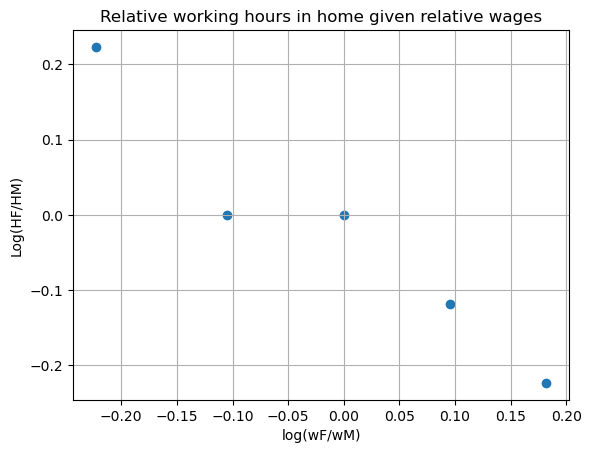

In [6]:
#We define the log of relative wages
log_rel_wage_list=np.log(par.wF_vec/par.wM)

#Plot log(HF/HM) against log(wF/wM() for the vector of female wages.
plt.scatter(log_rel_wage_list,log_rel_hours_list)
plt.title('Relative working hours in home given relative wages')
plt.xlabel('log(wF/wM)')
plt.ylabel('Log(HF/HM)')
plt.grid()

#for i in range(par.wF_vec):
    #plt.text(log_rel_wage_list[i], log_rel_hours_list[i], f"wF={par.wF_vec[i]}")
plt.show()

# Question 3

In [7]:
#We refer to the class
model_cont = HouseholdClass()

#We define the continuous solution
cont = model_cont.solve_continuous()

In [8]:
#We print the results of the continuous model
print(f'The initial optimal hours working at home for women is HF = {cont.HF:.2f}' '\n'f'The initial optimal hours working at home for men is HM = {cont.HM:.2f}''\n'f'The initial optimal hours working at the market for women is LF = {cont.LF:.2f}' '\n'f'The initial optimal hours working at the market for men is LM = {cont.LM:.2f}' )

The initial optimal hours working at home for women is HF = 4.46
The initial optimal hours working at home for men is HM = 4.46
The initial optimal hours working at the market for women is LF = 4.46
The initial optimal hours working at the market for men is LM = 4.46


In [9]:
# Using the model to calculate optimal HF and HM
model_cont = HouseholdClass()

# We unpack the model parameters
par = model_cont.par

# We create an empty list
log_rel_hours_cont_list=[]

# Looping over wF values
for wage in par.wF_vec:
    
    # Setting value
    par.wF = wage

    # Solving for continuous optimal choice
    opt_cont = model_cont.solve_continuous()

    # We create log(HM/HF)
    rel_hours_cont = opt_cont.HF/opt_cont.HM
    log_rel_hours_cont = np.log(rel_hours_cont)

    # We create log(wF/wM)
    log_rel_wage = np.log(par.wF_vec)

    #We append the results to the empty list
    log_rel_hours_cont_list = np.append(log_rel_hours_cont_list, log_rel_hours_cont)

    #We print our results
    print(f'When womens wage is {wage:.2f} and mens wage is wM = {par.wM:.2f}, the optimal working hours at home are {opt_cont.HF:.2f} for women and {opt_cont.HM:.2f} for men. Thus, their relative working hours are {rel_hours:.3f}. Taking the log of this fraction, we find log(HF/HM) = {log_rel_hours_cont:.3f}.')


When womens wage is 0.80 and mens wage is wM = 1.00, the optimal working hours at home are 5.06 for women and 4.04 for men. Thus, their relative working hours are 0.800. Taking the log of this fraction, we find log(HF/HM) = 0.225.
When womens wage is 0.90 and mens wage is wM = 1.00, the optimal working hours at home are 4.49 for women and 4.49 for men. Thus, their relative working hours are 0.800. Taking the log of this fraction, we find log(HF/HM) = 0.000.
When womens wage is 1.00 and mens wage is wM = 1.00, the optimal working hours at home are 4.46 for women and 4.46 for men. Thus, their relative working hours are 0.800. Taking the log of this fraction, we find log(HF/HM) = 0.000.
When womens wage is 1.10 and mens wage is wM = 1.00, the optimal working hours at home are 4.42 for women and 4.42 for men. Thus, their relative working hours are 0.800. Taking the log of this fraction, we find log(HF/HM) = -0.000.
When womens wage is 1.20 and mens wage is wM = 1.00, the optimal working ho

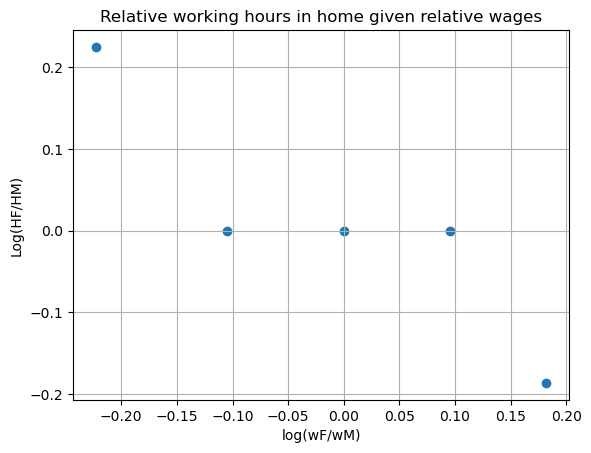

In [10]:
#We plot the results
#We define the log of relative wages
log_rel_wage_cont_list=np.log(par.wF_vec/par.wM)

plt.scatter(log_rel_wage,log_rel_hours_cont_list)
plt.title('Relative working hours in home given relative wages')
plt.xlabel('log(wF/wM)')
plt.ylabel('Log(HF/HM)')
plt.grid()

# Question 4


In [ ]:
model4 = HouseholdClass()
model4.run_regression()

# Question 5

ADD CONCISE CONLUSION.